In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset
data = pd.read_csv('202201-divvy-tripdata.csv')
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103765,8788DA3EDE8FD8AB,electric_bike,2022-01-18 12:36:48,2022-01-18 12:46:19,Clinton St & Washington Blvd,WL-012,NaN,NaN,41.883436,-87.641391,41.890000,-87.620000,casual
103766,C6C3B64FDC827D8C,electric_bike,2022-01-27 11:00:06,2022-01-27 11:02:40,Racine Ave & Randolph St,13155,NaN,NaN,41.884158,-87.656977,41.880000,-87.650000,casual
103767,CA281AE7D8B06F5A,electric_bike,2022-01-10 16:14:51,2022-01-10 16:20:58,Broadway & Waveland Ave,13325,Clark St & Grace St,TA1307000127,41.949066,-87.648611,41.950780,-87.659172,casual
103768,44E348991862319B,electric_bike,2022-01-19 13:22:11,2022-01-19 13:24:27,Racine Ave & Randolph St,13155,NaN,NaN,41.884005,-87.657031,41.880000,-87.660000,casual


In [3]:
# Size of the data
data.shape

(103770, 13)

In [4]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103770 entries, 0 to 103769
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             103770 non-null  object 
 1   rideable_type       103770 non-null  object 
 2   started_at          103770 non-null  object 
 3   ended_at            103770 non-null  object 
 4   start_station_name  87510 non-null   object 
 5   start_station_id    87510 non-null   object 
 6   end_station_name    85843 non-null   object 
 7   end_station_id      85843 non-null   object 
 8   start_lat           103770 non-null  float64
 9   start_lng           103770 non-null  float64
 10  end_lat             103684 non-null  float64
 11  end_lng             103684 non-null  float64
 12  member_casual       103770 non-null  object 
dtypes: float64(4), object(9)
memory usage: 10.3+ MB


In [5]:
# Data Stats
data.describe()

,start_lat,start_lng,end_lat,end_lng
count,103770.000000,103770.000000,103684.000000,103684.000000
mean,41.896850,-87.648622,41.896950,-87.648964
std,0.049664,0.053199,0.048400,0.031342
min,41.650000,-87.830000,41.648501,-87.830000
25%,41.879255,-87.664169,41.879344,-87.664358
50%,41.894877,-87.644098,41.895501,-87.644098
75%,41.925602,-87.629912,41.925602,-87.629912
max,45.635034,-73.796477,42.070000,-87.520000


C:\Users\SONY\AppData\Local\Temp\ipykernel_4184\3611415369.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'start_lat'),
  Text(1.5, 0, 'start_lng'),
  Text(2.5, 0, 'end_lat'),
  Text(3.5, 0, 'end_lng')])

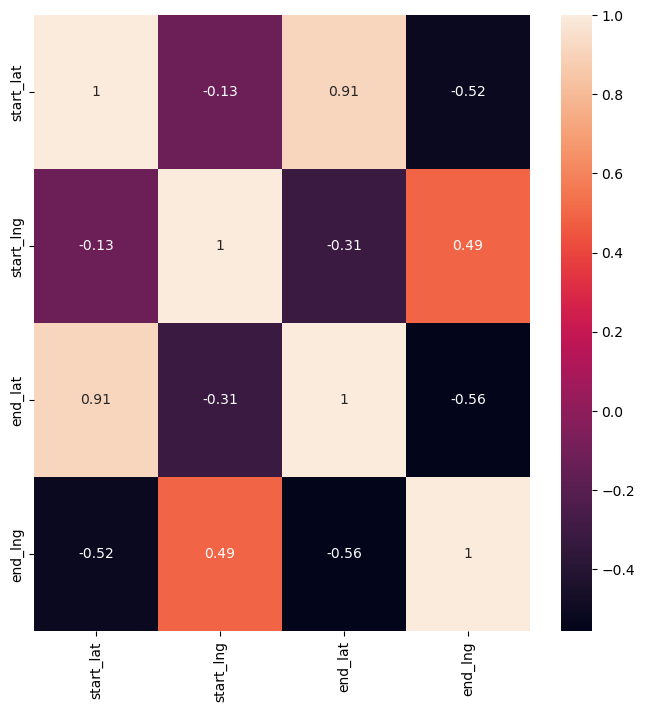

In [6]:
# Heatmap of data
plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(), annot = True)
plt.xticks(rotation = 90)

In [7]:
# To find missing values
data.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    16260
start_station_id      16260
end_station_name      17927
end_station_id        17927
start_lat                 0
start_lng                 0
end_lat                  86
end_lng                  86
member_casual             0
dtype: int64

In [8]:
# Fill missing values
data['start_station_name']=data['start_station_name'].fillna(data['start_station_name'].mode().iloc[0])
data['start_station_id']=data['start_station_id'].fillna(data['start_station_id'].mode().iloc[0])
data['end_station_name']=data['end_station_name'].fillna(data['end_station_name'].mode().iloc[0])
data['end_station_id']=data['end_station_id'].fillna(data['end_station_id'].mode().iloc[0])
data['end_lat']=data['end_lat'].fillna(data['end_lat'].median())
data['end_lng']=data['end_lng'].fillna(data['end_lng'].median())

In [9]:
# Check for missing values after filling
data.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [10]:
# Check for unique values in 'rideable_type'
unique_rideable_type = data['rideable_type'].unique()
unique_rideable_type

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [11]:
# Count of each 'rideable_type'
data.groupby('rideable_type')['rideable_type'].count()

rideable_type
classic_bike     55067
docked_bike        961
electric_bike    47742
Name: rideable_type, dtype: int64

In [12]:
# no. of 'rideable_type'
len(data['rideable_type'].unique())

3